In [1]:
import pandas as pd
import numpy as np


In [3]:

df = pd.read_csv("Housing.csv")


In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [6]:
df = pd.get_dummies(df, drop_first=True)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [8]:
X = df.drop('price', axis=1)
y = df['price']

X_scaled = scaler.fit_transform(X)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.model_selection import train_test_split


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [12]:
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (436, 13)
Testing set size: (109, 13)


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 1754318687330.6638
R² Score: 0.6529242642153184


In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [16]:
y_pred = lr_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [17]:
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Absolute Error (MAE): 970043.4039201636
Mean Squared Error (MSE): 1754318687330.6638
R² Score: 0.6529242642153184


Plot the Regression Line

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [19]:

feature_index = 0
feature_name = X.columns[feature_index]

X_single = X_test.iloc[:, feature_index].values.reshape(-1, 1)
y_single = y_test

In [20]:
simple_model = LinearRegression()
simple_model.fit(X_single, y_single)
y_line = simple_model.predict(X_single)

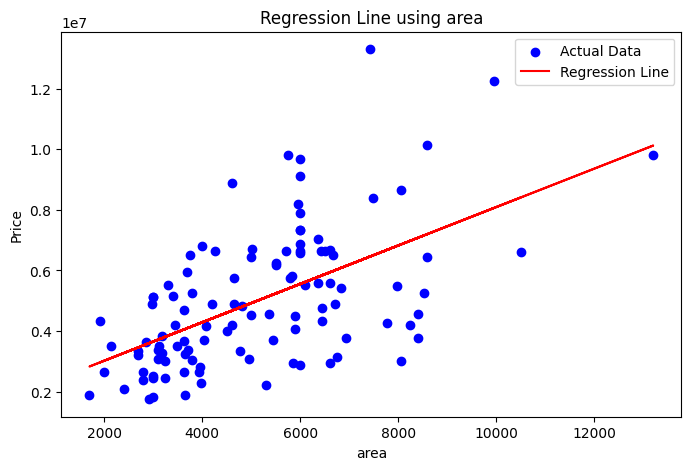

In [21]:
plt.figure(figsize=(8, 5))
plt.scatter(X_single, y_single, color='blue', label='Actual Data')
plt.plot(X_single, y_line, color='red', label='Regression Line')
plt.xlabel(feature_name)
plt.ylabel('Price')
plt.title(f'Regression Line using {feature_name}')
plt.legend()
plt.show()


Interpret Model Coefficients

In [22]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
})

In [23]:
print(coefficients)

print("Intercept (bias term):", lr_model.intercept_)

                            Feature   Coefficient
0                              area  2.359688e+02
1                          bedrooms  7.677870e+04
2                         bathrooms  1.094445e+06
3                           stories  4.074766e+05
4                           parking  2.248419e+05
5                      mainroad_yes  3.679199e+05
6                     guestroom_yes  2.316100e+05
7                      basement_yes  3.902512e+05
8               hotwaterheating_yes  6.846499e+05
9               airconditioning_yes  7.914267e+05
10                     prefarea_yes  6.298906e+05
11  furnishingstatus_semi-furnished -1.268818e+05
12     furnishingstatus_unfurnished -4.136451e+05
Intercept (bias term): 260032.35760741215
